In [48]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.tax import Tax
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.precision = 0
plt.rcParams['font.family'] = 'AppleGothic'

In [49]:
# 額面年収、200〜1,200万まで1万刻みで
gross_salaries = [i for i in range(2000000,12010000, 1000000)]
# 所得
incomes = []
# 税金
total_taxes = []
# 住民税
inhabitant_taxes = []
# 所得税
income_taxes = []
#社会保険料（=社会保険料控除）
social_insurance_premiums = []
# 手取り年収
net_salaries = []

In [50]:
for gross_salary in gross_salaries:
#    #tax = Tax(gross_salary, partner, high_school_student, college_student, handicapped)
    tax = Tax(gross_salary)
    if(gross_salary %500000 == 0):
        print("********************************")
        print("gross_salary, income = ", tax.gross_salary, tax.income)
        print("gross_salary/16, income/16 = ", tax.gross_salary/16, tax.income/16)
        print("income_tax, inhabitant_tax, insurance_premiun = ", tax.income_tax(), tax.inhabitant_tax(), tax.social_insurance_premium())
        print("income_tax/16, inhabitant_tax/16, insurance_premiun/16 = ", tax.income_tax()/16, tax.inhabitant_tax()/16, tax.social_insurance_premium()/16)
        print("net_salary = ", tax.net_salary())
        print("net_salary/16 = ", tax.net_salary()/16)

    # リストに値を追加
    incomes.append(tax.income)
    total_taxes.append(tax.income_tax() + tax.inhabitant_tax())
    inhabitant_taxes.append(tax.inhabitant_tax())
    income_taxes.append(tax.income_tax())
    social_insurance_premiums.append(tax.social_insurance_premium())
    net_salaries.append(tax.net_salary())

********************************
gross_salary, income =  2000000 1320000.0
gross_salary/16, income/16 =  125000.0 82500.0
income_tax, inhabitant_tax, insurance_premiun =  10615.0 28730.0 247699.99999999997
income_tax/16, inhabitant_tax/16, insurance_premiun/16 =  663.4375 1795.625 15481.249999999998
net_salary =  1712955.0
net_salary/16 =  107059.6875
********************************
gross_salary, income =  3000000 2020000.0
gross_salary/16, income/16 =  187500.0 126250.0
income_tax, inhabitant_tax, insurance_premiun =  39422.5 86345.0 371549.99999999994
income_tax/16, inhabitant_tax/16, insurance_premiun/16 =  2463.90625 5396.5625 23221.874999999996
net_salary =  2502682.5
net_salary/16 =  156417.65625
********************************
gross_salary, income =  4000000 2760000.0
gross_salary/16, income/16 =  250000.0 172500.0
income_tax, inhabitant_tax, insurance_premiun =  70230.0 147960.0 495399.99999999994
income_tax/16, inhabitant_tax/16, insurance_premiun/16 =  4389.375 9247.5 30962

In [51]:
df = pd.DataFrame()
df['年収'] = gross_salaries
df['手取り'] = net_salaries
df['税金'] = total_taxes
df['住民税'] = inhabitant_taxes
df['所得税'] = income_taxes
df['社会保険料'] = social_insurance_premiums

In [52]:
df.head()

,年収,手取り,税金,住民税,所得税,社会保険料
0,2000000,2e+06,39345,28730,10615,24770
1,3000000,3e+06,125768,86345,39422,37155
2,4000000,3e+06,218190,147960,70230,49540
3,5000000,4e+06,326150,215575,110575,61925
4,6000000,5e+06,461380,283190,178190,74310


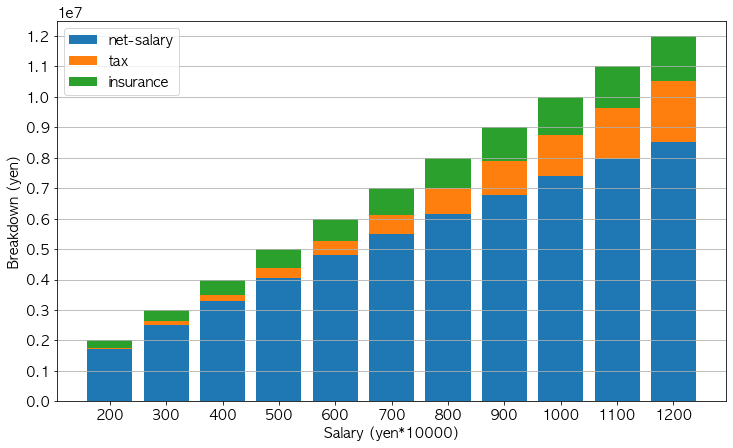

In [63]:
df.index = ['200', '300', '400', '500', '600', '700',  '800', '900', '1000', '1100', '1200']
plt.figure(figsize=(12,7))
plt.rcParams["font.size"] = 14
plt.grid(axis='y')
yticks = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, 11000000, 12000000]
plt.ylim(0, 12500000)
plt.yticks(yticks)
plt.bar(df.index, df['手取り'])
plt.bar(df.index, df['税金'], bottom= df['手取り'])
plt.bar(df.index, df['社会保険料'], bottom= df['手取り'] + df['税金'])
plt.xlabel('Salary (yen*10000)')
plt.ylabel('Breakdown (yen)')
plt.title('')
plt.legend(['net-salary', 'tax', 'insurance'])
plt.show()